# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import os
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint


# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



612

In [4]:
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Performing API calls
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")
        

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : ponta do sol
Processing Record 2 of Set 1 : rikitea
Processing Record 3 of Set 1 : qaanaaq
Processing Record 4 of Set 1 : san cristobal
Processing Record 5 of Set 1 : roma
Processing Record 6 of Set 1 : cherskiy
Processing Record 7 of Set 1 : kapaa
Processing Record 8 of Set 1 : hermanus
Processing Record 9 of Set 1 : planaltina
Processing Record 10 of Set 1 : lompoc
Processing Record 11 of Set 1 : tuktoyaktuk
Processing Record 12 of Set 1 : atuona
Processing Record 13 of Set 1 : ribeira grande
Processing Record 14 of Set 1 : maykor
City not found. Skipping...
Processing Record 15 of Set 1 : katsuura
Processing Record 16 of Set 1 : marawi
Processing Record 17 of Set 1 : carnarvon
Processing Record 18 of Set 1 : albany
Processing Record 19 of Set 1 : the valley
Processing Record 20 of Set 1 : nueva guinea
Processing Record 21 of Set 1 : busselton
Processing Record 22 of Set 1 : port alfred
Processin

Processing Record 34 of Set 4 : isangel
Processing Record 35 of Set 4 : mendi
Processing Record 36 of Set 4 : chuy
Processing Record 37 of Set 4 : samarai
Processing Record 38 of Set 4 : charters towers
Processing Record 39 of Set 4 : qasigiannguit
Processing Record 40 of Set 4 : maragogi
Processing Record 41 of Set 4 : broome
Processing Record 42 of Set 4 : san jose
Processing Record 43 of Set 4 : juba
City not found. Skipping...
Processing Record 44 of Set 4 : belmonte
Processing Record 45 of Set 4 : saryozek
Processing Record 46 of Set 4 : hambantota
Processing Record 47 of Set 4 : marienburg
Processing Record 48 of Set 4 : puerto carreno
Processing Record 49 of Set 4 : east london
Processing Record 50 of Set 4 : makakilo city
City not found. Skipping...
Processing Record 0 of Set 5 : maxixe
Processing Record 1 of Set 5 : kemijarvi
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 5 : lebu
Processing Record 3 of Set 5 : kaitangata
City not found. Ski

Processing Record 19 of Set 8 : chapais
Processing Record 20 of Set 8 : saint-prosper
Processing Record 21 of Set 8 : san rafael
Processing Record 22 of Set 8 : haverfordwest
Processing Record 23 of Set 8 : isparta
Processing Record 24 of Set 8 : ourossogui
Processing Record 25 of Set 8 : kolokani
Processing Record 26 of Set 8 : kahului
Processing Record 27 of Set 8 : verkh-usugli
Processing Record 28 of Set 8 : gat
Processing Record 29 of Set 8 : prince rupert
Processing Record 30 of Set 8 : arrifes
Processing Record 31 of Set 8 : fasa
Processing Record 32 of Set 8 : swellendam
Processing Record 33 of Set 8 : paraiso
Processing Record 34 of Set 8 : takoradi
Processing Record 35 of Set 8 : ottawa
Processing Record 36 of Set 8 : alta floresta
Processing Record 37 of Set 8 : gorom-gorom
Processing Record 38 of Set 8 : ossora
Processing Record 39 of Set 8 : havoysund
Processing Record 40 of Set 8 : moroni
Processing Record 41 of Set 8 : portland
City not found. Skipping...
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Create a dataframe using information from data retrieval
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

In [10]:
#Count weather data
weather_data.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Clouds        563
Wind Speed    563
Country       563
Date          563
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Saving CSV file
weather_data.to_csv("../output_data/cities.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

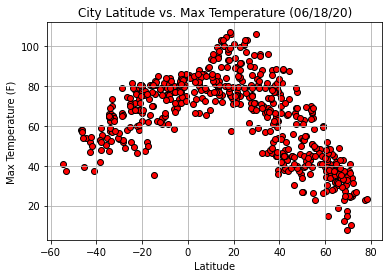

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "red", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Max Temperature.png")
# this plot is showing the Latitude vs temperature correlation, and it shows lower
#temperartures to exttreme high, or low elevation

## Latitude vs. Humidity Plot

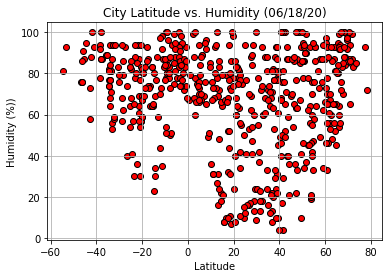

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "red", edgecolor = "black")

plt.title("City Latitude vs. Humidity (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Humidity.png")
# this plot is showing the Latitude vs Humidity correlation,and I dont believe there is any relationship here.

## Latitude vs. Cloudiness Plot

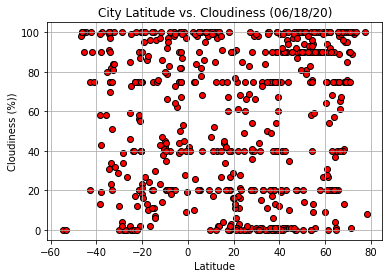

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "red", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Cloudiness.png")
# this plot is showing the Latitude vs Cloudiness correlation,and I dont believe there is any relationship here.

## Latitude vs. Wind Speed Plot

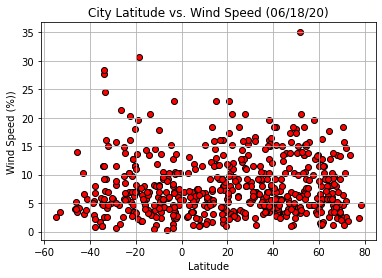

In [17]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "red", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Wind Speed.png")
# this plot is showing the Latitude vs Windspeed correlation,and I dont believe there is any relationship here.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
nothern = weather_data.loc[weather_data["Lat"] >= 0.0]
nothern

southern = weather_data.loc[weather_data["Lat"] < 0.0]
southern


,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
1,Rikitea,-23.1203,-134.9692,78.12,78,17,10.20,PF,1620471614
7,Hermanus,-34.4187,19.2345,66.00,82,99,5.01,ZA,1620471616
8,Planaltina,-15.4528,-47.6142,69.80,64,75,5.75,BR,1620471616
11,Atuona,-9.8000,-139.0333,79.52,78,35,17.76,PF,1620471617
16,Carnarvon,-24.8667,113.6333,71.60,68,0,13.80,AU,1620471619
...,...,...,...,...,...,...,...,...,...
551,Broken Hill,-31.9500,141.4333,57.20,94,32,4.61,AU,1620471781
558,Aitape,-3.1374,142.3475,80.91,84,75,4.23,PG,1620471783
559,Caravelas,-17.7125,-39.2481,75.70,86,13,7.67,BR,1620471784
560,Pedra Branca,-5.4542,-39.7172,71.19,95,64,3.98,BR,1620471653


In [23]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"../images/fig{ifig}.png")
    plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7062358384156944


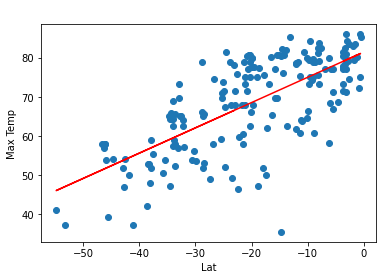

In [31]:

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)
# this plot is showing the Southern Hemisphere - Max Temp vs. Latitude Linear Regression,and it appears the average temperature rises with the elevation.
                    

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19966374574868043


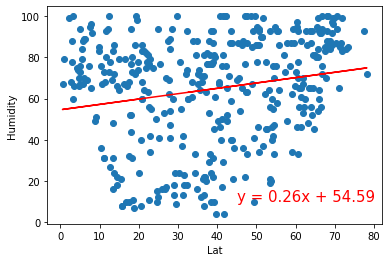

In [32]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)
# this plot is showing the Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression,and I dont believe there is any relationship here.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008131993038162267


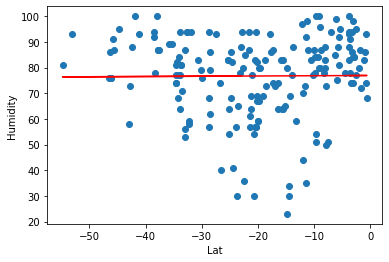

In [33]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)
# this plot is showing the Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression,and I dont believe there is any relationship here.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16082856594777967


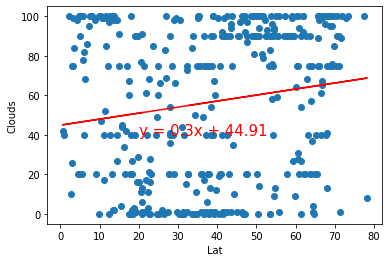

In [34]:
xlbl = "Lat"
ylbl = "Clouds"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)
# this plot is showing the Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression,and I dont believe there is any relationship here.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.01951976407691043


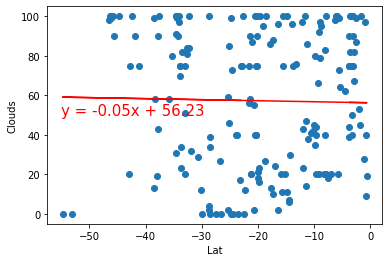

In [35]:
xlbl = "Lat"
ylbl = "Clouds"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)
# this plot is showing the Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression,and I dont believe there is any relationship here.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03174949644725733


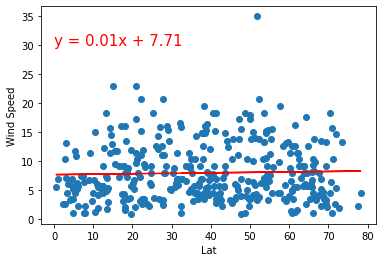

In [36]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)
# this plot is showing the Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression,and The Latitude does not seem to have any effect on wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014931021694639628


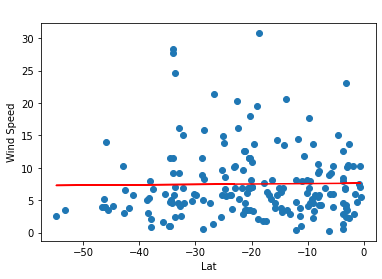

In [37]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)
# this plot is showing the Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression,and The Latitude does not seem to have any effect on wind speed.